# NBA - Stats and Linear Regression

In [1]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

C:\Users\Yooru\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Read training dataset

In [2]:
filename=r'NbaStats.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.dropna()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')


DESCRIBE DATA:
        Game Played       Wins     Losses     WIN %  Minutes Played  \
count         30.0  30.000000  30.000000  30.00000       30.000000   
mean          82.0  41.000000  41.000000   0.50000       48.283333   
std            0.0  12.222083  12.222083   0.14908        0.164177   
min           82.0  21.000000  17.000000   0.25600       48.100000   
25%           82.0  28.250000  34.000000   0.34425       48.125000   
50%           82.0  44.000000  38.000000   0.53700       48.250000   
75%           82.0  48.000000  53.750000   0.58500       48.400000   
max           82.0  65.000000  61.000000   0.79300       48.700000   

           Points  Field Goals Made  Field Goals Attempted  Field Goal %  \
count   30.000000         30.000000              30.000000     30.000000   
mean   106.336667         39.606667              86.063333     46.026667   
std      3.800860          1.393317               1.552192      1.504461   
min     98.800000         36.700000             

## Read testing dataset

In [3]:
filename2=r'NbaPredict.csv'
data_test=pd.read_csv(filename2,index_col=None,na_values='?',sep = ',')
data_test=data_test.dropna()

print("\nDESCRIBE DATA:\n",data_test.describe())
data_test.describe().to_excel(r'original_Describe.xlsx')


DESCRIBE DATA:
        Game Played       Wins     Losses      WIN %  Minutes Played  \
count         30.0  30.000000  30.000000  30.000000       30.000000   
mean          82.0  41.000000  41.000000   0.499967       48.320000   
std            0.0  12.028701  12.028701   0.146707        0.158441   
min           82.0  17.000000  22.000000   0.207000       48.100000   
25%           82.0  33.000000  32.250000   0.402000       48.200000   
50%           82.0  41.500000  40.500000   0.506000       48.300000   
75%           82.0  49.750000  49.000000   0.607000       48.400000   
max           82.0  60.000000  65.000000   0.732000       48.700000   

           Points  Field Goals Made  Field Goals Attempted  Field Goal %  \
count   30.000000         30.000000              30.000000     30.000000   
mean   111.203333         41.073333              89.213333     46.046667   
std      4.093180          1.672069               2.110194      1.323458   
min    103.500000         38.000000    

## Print correlation graphs & Scatter

C:\Users\Yooru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Yooru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Yooru\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


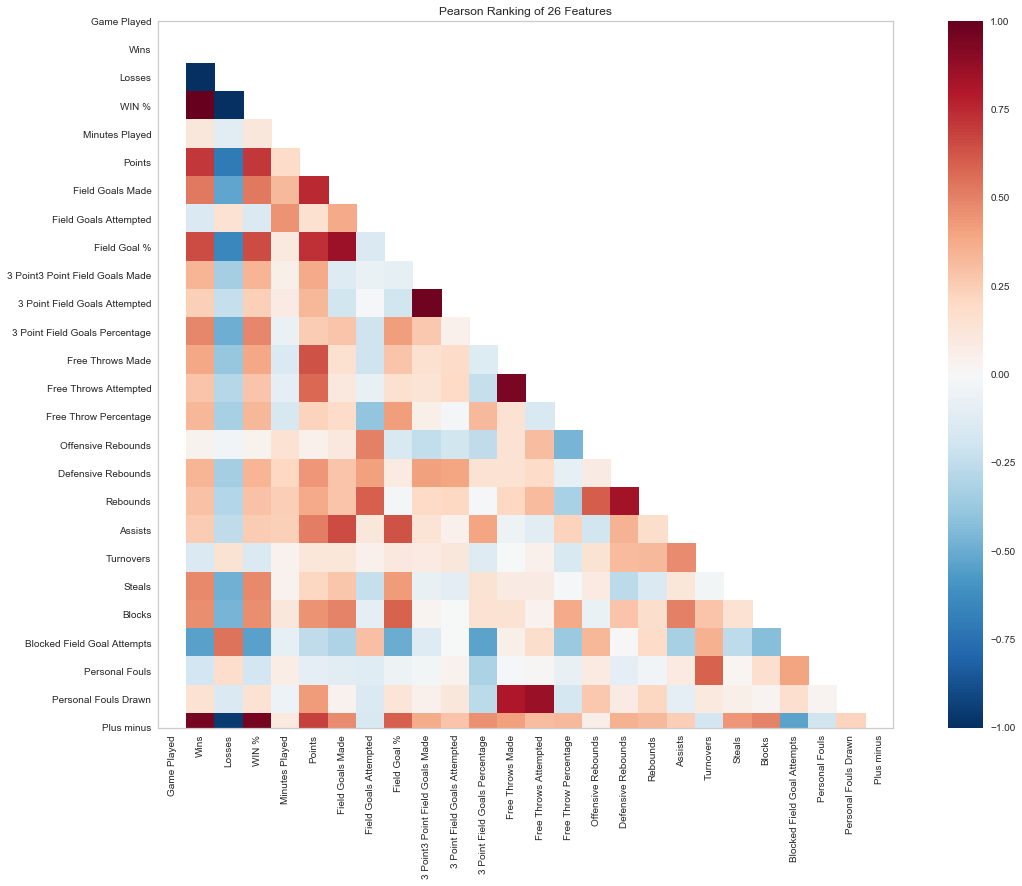

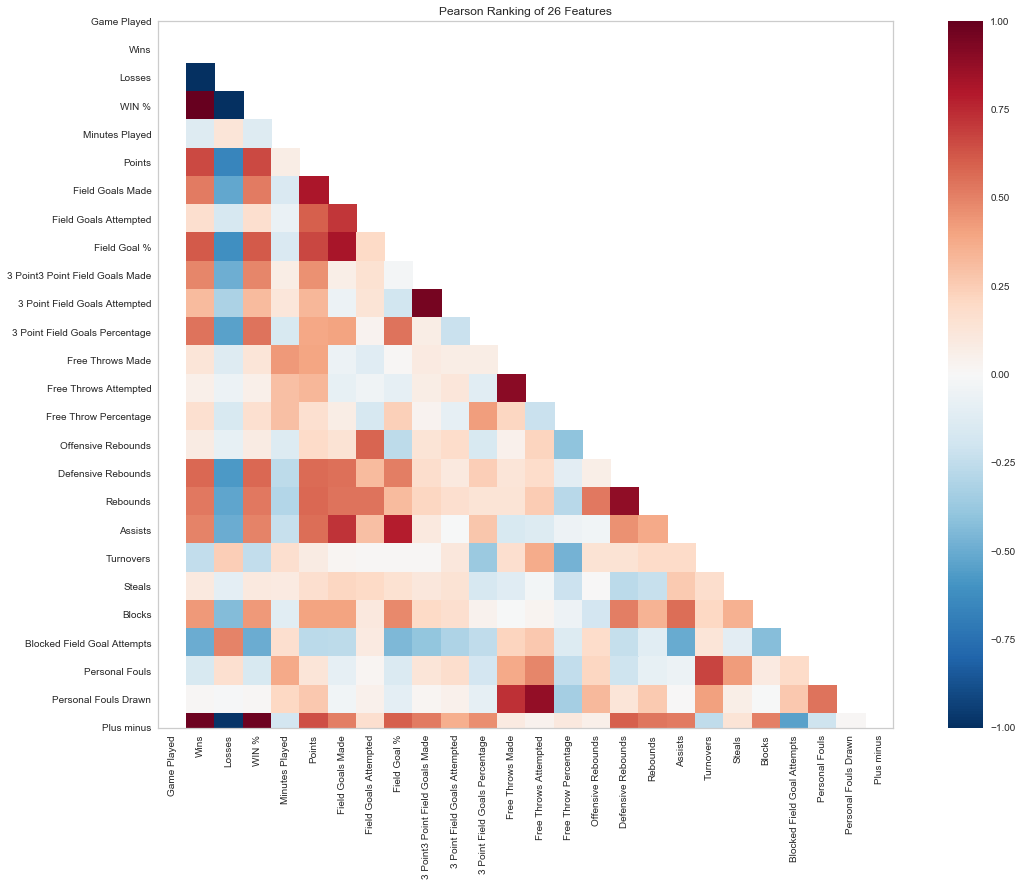

C:\Users\Yooru\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


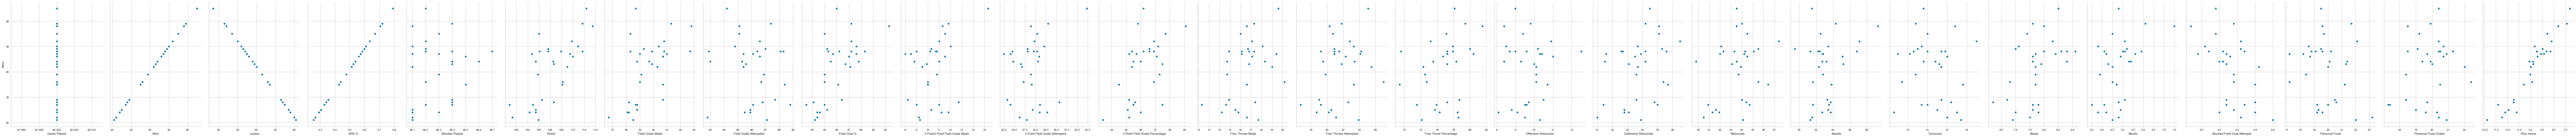

In [4]:
from yellowbrick.features import Rank2D

def pearsonCor(data):
    visualizer = Rank2D(algorithm="pearson",size=(1080*1.3, 720*1.3))
    visualizer.fit_transform(data)# or df_scaled
    visualizer.show()
    
def scatPlot(data):
    # visualize the relationship between the features and the response using scatterplots
    sns.pairplot(data, x_vars=data.columns, y_vars='Wins', size=7, aspect=0.7)

    
pearsonCor(data_train)
pearsonCor(data_test)
scatPlot(data_train)

## Drop Columns & Result Notes
trash=['Losses','WIN %','Game Played','Points']:

##### Testataan vaihtamalla poistettava kenttä:
Personal Fouls Drawn = vaikutus 0,0123->0,0143<br>
3 Point Field Goals Attempted = vaikutus 0,0123->0,0138<br>
3 Point3 Point Field Goals Made = vaikutus 0,0123->0,0140<br>
Plus minus = vaikutus 0,0123->0,0346<br>
Block = vaikutus 0.0123->0,0130<br>

Free Throws Attempted = vaikutus 0,0123->0,0125<br>
##### Rebounds = vaikutus 0.0123->0,01239 --> sama mse kun default<br>
Steals =vaikutus 0.012392->012394<br>
TurnOvers = vaikutus 0.012392 --> 0.01241<br>
##### Offensive Rebounds = 0.012392 --> 0.012392

#### trash=['Losses','WIN %','Game Played','Points','Offensive Rebounds','Rebounds','Steals']:
0.0129

#### trash=['Losses','WIN %','Game Played','Points','Offensive Rebounds','Rebounds','Steals','Blocked Field Goal Attempts']:
0.01293 #Todennäköisesti paras malli todella pienellä hävikillä

In [5]:
def dropColumns(data,listOfValues):
    list=listOfValues
    data=data
    for i in range (len(list)):
        data=data.drop([list[i]],axis=1)
    return data

trash3=['Losses','WIN %','Game Played','3 Point Field Goals Attempted','Free Throws Attempted','Plus minus','Field Goal %',
 'Personal Fouls Drawn','Rebounds','Points','Field Goals Attempted','Free Throw Percentage','3 Point Field Goals Percentage'
]

trash=['Losses','WIN %','Game Played','Points','Offensive Rebounds','Rebounds','Steals','Blocked Field Goal Attempts'
]

trash2=['Losses','WIN %','Game Played','3 Point Field Goals Attempted','Free Throws Attempted','Plus minus',
 'Personal Fouls Drawn','Rebounds','Points','Field Goals Attempted'
]



data_train=dropColumns(data_train,trash)
data_test=dropColumns(data_test,trash)
#print(data_train.describe())


## Split & Standardize Data

In [6]:
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
colnames = data_train.columns.get_values()
colnames = data_train.iloc[:,1:len(colnames)+1].columns.get_values()

#dataT=pd.DataFrame(scaler.fit_transform(data_train))


dataT=pd.DataFrame(scaler.fit_transform(data_test))
X_all=dataT.iloc[:,1:len(colnames)+2]
y_all=dataT.iloc[:,0]

X_test=dataT.iloc[:,1:len(colnames)+2]
y_test=dataT.iloc[:,0]

colnames
X_all.shape

C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


(30, 17)

## Fit & Predict

In [7]:
def LinearReg(x,y,x_test,y_test):

    # build and fit model
    clf = LinearRegression()
    clf.fit(x,y)

    # output model
    print("Coefficients:" ,clf.coef_)
    print("Intercept:", clf.intercept_)

    # compute predicted values
    pred = clf.predict(x_test)

    # compute error statistics
    mse = mean_squared_error(y_test, pred)
    r2s = r2_score(y_test, pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    return clf.coef_

coef = LinearReg(X_all,y_all,X_test,y_test)
coef = pd.DataFrame(coef.reshape(1,17))

Coefficients: [ 0.03944633 -1.71883568  1.02687097  1.13095873 -1.20409058  1.13540705
  0.42870306  1.04716955 -0.98970947 -0.40264649  0.05696587  0.04189174
  0.04363113 -0.08089114  0.10525129 -0.13382772  1.04664856]
Intercept: -2.9814009338311493e-15
MSE =  0.012936428765694436
R2s =  0.9870635712343055


## Graph
Values close to zero affect less on MSE

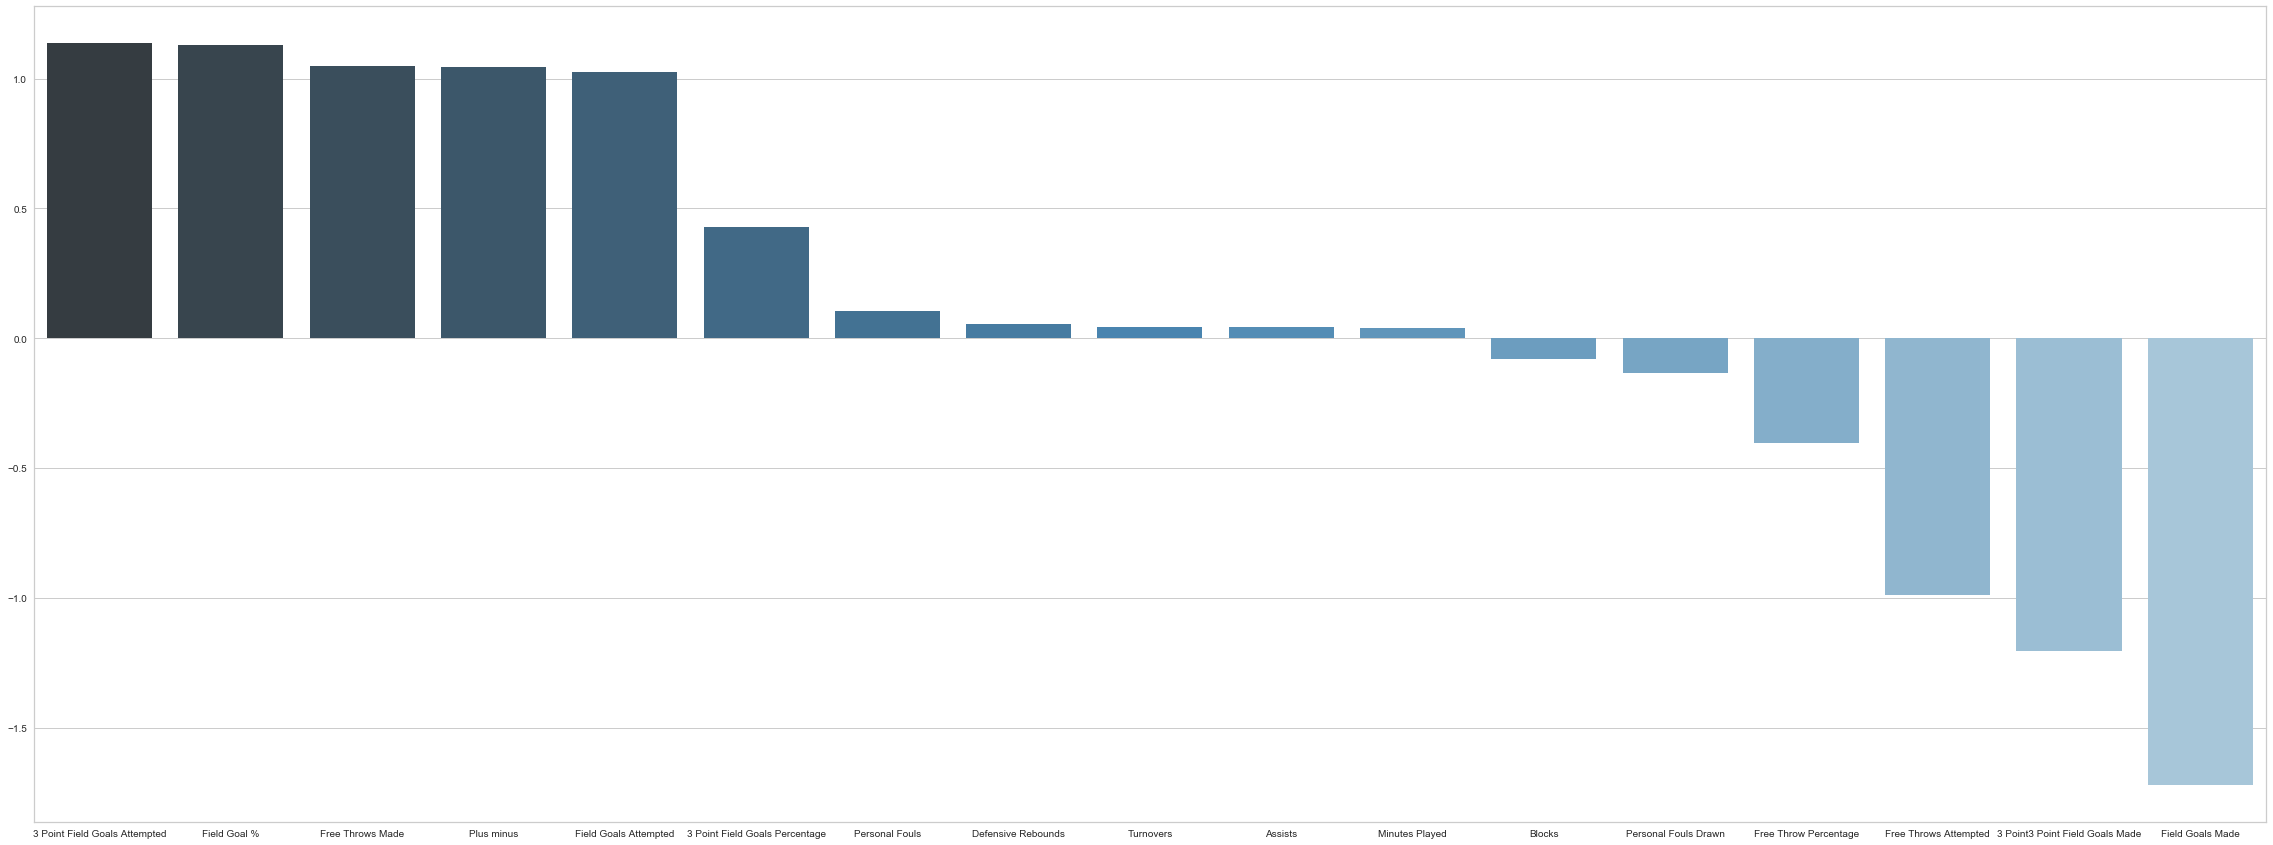

In [8]:
import matplotlib.pyplot as plt

coef.columns=colnames

coef = coef
coef=coef.sort_values(by=0, ascending=False, axis=1)
plt.figure(figsize=(40, 15))
ax = sns.barplot(data=coef,palette="Blues_d")
plt.savefig("BasketBall.png")